# Aplicaciones de Aprendizaje Automático sobre Spotify 

## Propósito del documento

El objetivo del documento es explicar la aplicación de diferentes técnicas de aprendizaje automático sobre el dataset de [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db). El objetivo del proyecto será estudiar diferentes configuraciones de las técnicas  para determinar la popularidad que tendrá una canción.

## Descripción del Dataset

El dataset tiene un tamaño de 32,15 MB, contiene 232,725 pistas de música. Los datos para cada una de las pistas de música son los siguientes:
- **Genre**: Género (Película, Jazz, Reggaeton...)
- **artist_name**: Nombre del artista
- **track_name**: Nombre de la pista
- **track_id**: El id de Spotify para la pista.
- **Popularity**: Ínidice de popularidad de una pista (0- 100)
- **Acousticness**: Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1,0 representa una alta confianza de que la pista es acústica.
- **Danceability**: describe lo adecuado que es un tema para el baile basado en una combinación de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0.0 es el menos bailable y 1.0 es el más bailable. 
- **Duration_ms**: La duración de la pista en milisegundos.  
- **Energy**: La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de la intensidad y la actividad. Típicamente, las huellas de energía se sienten rápidas, fuertes y ruidosas.
- **Instrumentalness**: Predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" son tratados como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". 
- **Key**: La clave general estimada de la pista. Los números enteros se asignan a los lanzamientos usando la notación estándar de la clase de lanzamiento. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1.
- **Liveness**: Detecta la presencia de una audiencia en la grabación ( 1 música en concierto)
- **Loudness**: La sonoridad global de una pista en decibelios (dB)
- **Mode**: El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. La mayor se representa por 1 y la menor por 0. 
- **Speechiness**:  detecta la presencia de palabras habladas en una pista
- **Tempo**: El tempo global estimado de una pista en pulsaciones por minuto (BPM). En la terminología musical, el tempo es la velocidad o el ritmo de una pieza dada y se deriva directamente de la duración media del tiempo
- **Time_signature**: Una firma de tiempo global estimada de una pista. La signatura de tiempo (metro) es una convención notacional para especificar cuántos latidos hay en cada barra (o medida).
- **Valence**: Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista (1 muy positivo)

## Librerías

In [1]:
!pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in c:\users\manu_\anaconda3\lib\site-packages (2.2.2)


In [2]:
import pandas as pd
import numpy as np
from numpy import argmax
from sklearn.preprocessing import LabelBinarizer
import numpy.ma as ma
from sklearn.linear_model import LogisticRegression

from pandas.io.parsers import read_csv
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

###########################
####     OUR CLASES     ###
###########################
from LogisticRegression import OurLogisticRegression

## Lectura de Datos

In [3]:
data = pd.read_csv("data/SpotifyFeatures.csv")

In [4]:
data.shape

(232725, 18)

In [5]:
data.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Selección de variables dependientes ( x<sub>1 </sub>... x<sub>n </sub>) y Variable objetivo (y)

Las varaibles dependientes serán:
- acousticness
- danceability
- duration_ms
- energy
- instrumentalness
- key
- liveness 
- mode
- speechiness
- tempo
- time_signature
- valence
- genre

La variable objetivo será la popularidad de la canción

In [6]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'mode',
       'speechiness', 'tempo', 'valence', 'A', 'A#', 'B',
       'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A Capella',
       'Alternative', 'Anime', 'Blues', "Children's Music",
       'Classical', 'Comedy', 'Country', 'Dance', 'Electronic', 'Folk',
       'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera', 'Pop', 'R&B', 'Rap',
       'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul', 'Soundtrack', 'World']
target = 'popularity'

## Preprocesamiento

Antes de la elaboración de los modelos y las prueba de los mismos con diferentes configuraciones, debemos realizar un preoprocesado de los datos, en aquellas columnas que han sido seleccionadas para pertencer a los ejemplos de entrenamiento y no son númericas

#### Columna mode

Primero comprobaremos los diferentesvalores que tiene la columna

In [7]:
data['mode'].unique()

array(['Major', 'Minor'], dtype=object)

Como podemos comprobar la columna solo tiene valores Minor & Major, por ello, se colocará un 0 cuando el valor de la celda sea Minor y un 1 cuando el valor de la celda sea Major.

In [8]:
data.loc[data['mode'] == 'Minor', 'mode'] = 0
data.loc[data['mode'] == 'Major', 'mode'] = 1
data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
160977,Reggaeton,Ñejo,Quisiera Ser Santa Claus,15odV2bnHPbWOpYqgHkVhv,36,0.25200,0.722,236616,0.528,0.000000,C#,0.4700,-9.838,1,0.2620,145.978,4/4,0.5510
170781,Comedy,Whitney Cummings,Porn,2Zej1hAaeo4Zy4KT9ZhEzi,23,0.82500,0.562,260097,0.970,0.000000,D#,0.8010,-4.279,0,0.8850,121.631,5/4,0.2800
141886,Indie,Vera Blue,Mended,0jzOBl9Qm6po1hXrgqIVCF,58,0.24800,0.405,305120,0.539,0.006740,C,0.0642,-6.830,1,0.0387,78.027,4/4,0.0797
156148,Rock,Third Eye Blind,Jumper - 2006 Remastered Version,7BXltyNuwOX7tvOWbVWofa,49,0.00606,0.622,273467,0.590,0.000702,C,0.2860,-7.517,1,0.0363,91.089,4/4,0.5260
46308,Blues,Bad Company,Can't Get Enough - 2015 Remaster,6n5lHdpuBDdA7pYDpiKzEI,51,0.31400,0.638,256360,0.686,0.230000,C,0.0678,-9.876,1,0.0366,126.045,4/4,0.7660


#### Columna key

Tras leer varios artículos, hemos aprendido que no es bueno que en columna con muchos posibles valores categóricos, transformarla en una columna solo con valores que representen al valor categórico, ya que los algunos modelos asignan mayor importancia a valores más altos, poor ello debemos creearnos columnas de tipo bool con nombres de los valores categóricos y poner un 1 si se trata de este valor categórico y cero en caso contrario, esta técnica se denomina OneHotEncoder. Procedemos a crearlas:

In [9]:
lb = LabelBinarizer()
data = data.join(pd.DataFrame(lb.fit_transform(data["key"]),columns=lb.classes_,index=data.index))

#### Columna Genre

In [10]:
lb = LabelBinarizer()
data = data.join(pd.DataFrame(lb.fit_transform(data["genre"]),columns=lb.classes_,index=data.index))

#### Obtener variables independienties y objetivo

### Selección conjunto entrenamiento, validación, test

A lo largo del proyecto se utilizarán tres conjuntos de datos para la realización de pruebas:
- **Entrenamiento**: 70% de las pistas de música
- **Validación**: 20% de las pistas de música
- **Test**: 10% de las pistas de música

In [11]:
data = data.sample(frac=1)

In [12]:
data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
179315,Jazz,Alice Coltrane,Something About John Coltrane,6p1D7kXSeW6saOJteQ7orb,29,0.15700,0.299,580827,0.551,0.027200,...,0,0,0,0,0,0,0,0,0,0
89143,Hip-Hop,Kid Cudi,In My Dreams (Cudder Anthem),3Xm9jQDd8my7ui5DUtEHYf,51,0.29100,0.676,199000,0.394,0.000033,...,0,0,0,0,0,0,0,0,0,0
196622,Soul,John Legend,Wrap Me Up in Your Love,7EbRVU97goqzqVsRhXsXZ5,39,0.47100,0.632,225040,0.759,0.000021,...,0,0,0,0,0,0,0,1,0,0
136780,Reggae,Passafire,Souvenir,4d2Ul1vQQBYTIL4sNl6mI6,23,0.00134,0.499,261080,0.818,0.005270,...,0,0,0,1,0,0,0,0,0,0
60041,R&B,Lianne La Havas,Unstoppable - FKJ Remix,0mBe4dWMRLXvrAs8ixpmbp,55,0.18300,0.647,316304,0.562,0.000504,...,0,1,0,0,0,0,0,0,0,0


In [13]:
train = data[:int(data.shape[0] * 0.7)]
val = data[int(data.shape[0] * 0.7):int(data.shape[0] * 0.9)]
test = data[int(data.shape[0] * 0.9):]

In [14]:
print('La estructura del dataframe de Test es {}'.format(train.shape))
print('La estructura del dataframe de Test es {}'.format(val.shape))
print('La estructura del dataframe de Test es {}'.format(test.shape))

La estructura del dataframe de Test es (162907, 57)
La estructura del dataframe de Test es (46545, 57)
La estructura del dataframe de Test es (23273, 57)


In [15]:
X_train = np.array(train[features])
Y_train = np.array(train[target])
X_val = np.array(val[features])
Y_val = np.array(val[target])
X_test = np.array(test[features])
Y_test = np.array(test[target])

## Regresión Lineal

- Separamos datos en entrenamiento, validación y test
- Normalizamos datos
- Averiguamos coste y thethas optimas (linearCostGrad y después optimize)
- ¿Se usa la funcion optimice de scipy (como en la practica 5 de Regresión Lineal Regularizada)? ¿O se hace todo con nuestro código como en la práctica 1?
- Pintamos error en datos de entrenamiento y de validación.
- Elegimos parámetro de regularización.
- Creamos modelo.


In [16]:
def cost(thetas, X, Y, reg=0):
    m = X.shape[0]
    H = np.dot(X, thetas)
    cost = (1/(2*m)) * np.sum((H-Y.T)**2) + ( reg / (2 * m) ) * np.sum(thetas[1:]**2)
    return cost

def gradient(thetas, X, Y, reg=0):
    tt = np.copy(thetas)
    tt[0]=0
    m = X.shape[0]
    H = np.dot(X, thetas)
    gradient = ((1 / m) * np.dot(H-Y.T,X)) + ((reg/m) * tt)
    return gradient

def linearCostGrad(thetas,X,Y,reg=0):
    return (cost(thetas,X,Y,reg),gradient(thetas,X,Y).flatten())

def polinomial_data(X,p):
    X_poly = X
    for i in range(1, p):
        X_poly = np.column_stack((X_poly, np.power(X, i+1)))   
    return X_poly

def normalize(X):
    medias = np.mean(X,axis=0)
    sigmas = np.std(X,axis=0)
    
    X_normalizada = (X - medias) / sigmas
    
    return (X_normalizada, medias, sigmas)

## Regresión Logística

#### Regresión Logística Implementada

Previamente, dado que actuamente la variable popularidad es una variable continua deberemos discretizarla,para ello se crearán las siguientes clases:
- Alta: Popularidad > 70
- Popularidad Media: 40 <= Popularidad <= 70
- Popularidad Baja : Popularidad < 40

In [17]:
Y_train = np.array(np.where(Y_train < 50, 0, 1))
Y_val = np.array(np.where(Y_val < 50, 0, 1))
Y_test = np.array(np.where(Y_test < 50, 0, 1))

In [18]:
log_reg = OurLogisticRegression(num_features=X_train.shape[1],num_labels=2)

In [19]:
log_reg.fit(X=X_train, Y=Y_train)

In [21]:
log_reg.score(Y_test,log_reg.predict(X_test))

85.05564387917329

Comprobamos como evoluciona la precisión en función del parámetro de regualrización:
    

Text(0.5, 1.0, 'Evolución de la precisión en función de la regularización')

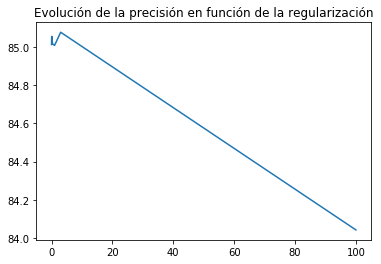

In [24]:
regs = [0, 0.01, 0.03, 0.1, 0.3, 1, 3, 100]
acc = []
for reg in regs:
    log_reg = OurLogisticRegression(num_features=X_train.shape[1],num_labels=2,reg=reg)
    log_reg.fit(X=X_train, Y=Y_train)
    acc.append(log_reg.score(Y_test,log_reg.predict(X_test)))
    
plt.plot(regs,acc)
plt.title("Evolución de la precisión en función de la regularización")

#### Regresión Logística Scikit-learn

In [22]:
models = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [23]:
for solver in models:
    if solver == "liblinear":
        model = LogisticRegression(solver=solver)
    else: 
        model = LogisticRegression(solver=solver, multi_class ="multinomial")
    model.fit(X=X_train, y=Y_train)
    print("La precisión con el algoritmo {} es: {} % ".format(solver, model.score(X_test, Y_test) * 100))

La precisión con el algoritmo newton-cg es: 85.01267563270743 % 
La precisión con el algoritmo lbfgs es: 63.12465088299747 % 
La precisión con el algoritmo liblinear es: 63.12465088299747 % 
La precisión con el algoritmo sag es: 63.12465088299747 % 
La precisión con el algoritmo saga es: 63.12465088299747 % 


Escogemos el algoritmo de optimización newton-cg y probamos diferentes configuraciones:

Text(0.5, 1.0, 'Evolución de la precisión en función del parámetro C')

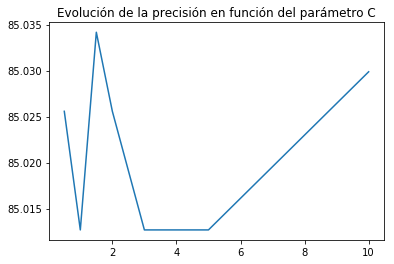

In [30]:
C_params = [0.5,1 ,1.5, 2, 3, 5, 10]
acc = []
for C in C_params:
    model = LogisticRegression(solver='newton-cg', multi_class ="multinomial", C=C)
    model.fit(X=X_train, y=Y_train)
    acc.append(log_reg.score(Y_test,model.predict(X_test)))
    
plt.plot(C_params,acc)
plt.title("Evolución de la precisión en función del parámetro C")

## Redes Neuronales

## Máquinas de vector de soporte